In [2]:
#-*- coding: utf-8 -*-
#数据标准化到[0,1]
import pandas as pd

#参数初始化
filename = '../data/business_circle.xls' #原始数据文件
standardizedfile = '../tmp/standardized.xls' #标准化后数据保存路径
#########使用index_col来建立索引列，不包含在data中
data = pd.read_excel(filename, index_col = u'基站编号') #读取数据

data = (data - data.min())/(data.max() - data.min()) #离差标准化
data = data.reset_index()

data.to_excel(standardizedfile, index = False) #保存结果

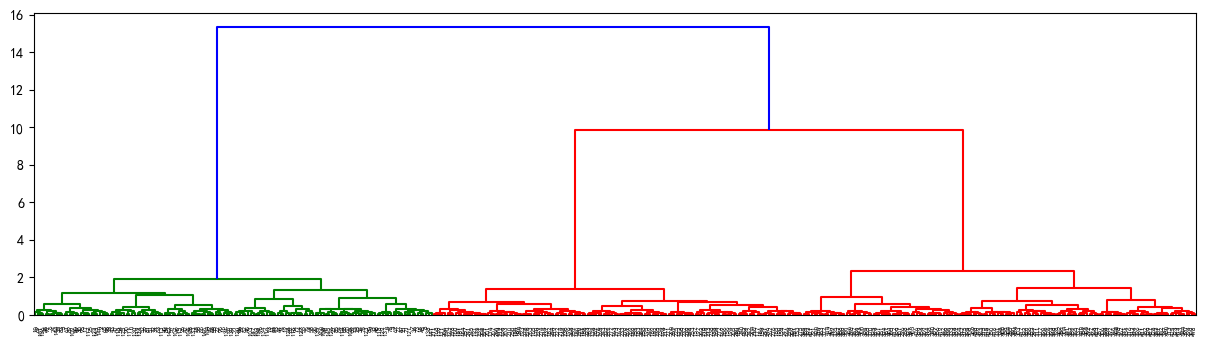

In [22]:
%matplotlib inline
#-*- coding: utf-8 -*-
#谱系聚类图
import pandas as pd

#参数初始化
standardizedfile = '../data/standardized.xls' #标准化后的数据文件
data = pd.read_excel(standardizedfile, index_col = u'基站编号') #读取数据

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0, 4.0)
plt.rcParams['figure.dpi'] = 100

from scipy.cluster.hierarchy import linkage,dendrogram
#这里使用scipy的层次聚类函数

Z = linkage(data, method = 'ward', metric = 'euclidean') #谱系聚类图
P = dendrogram(Z, 0) #画谱系聚类图
plt.savefig(u'cluster.png')
plt.show()

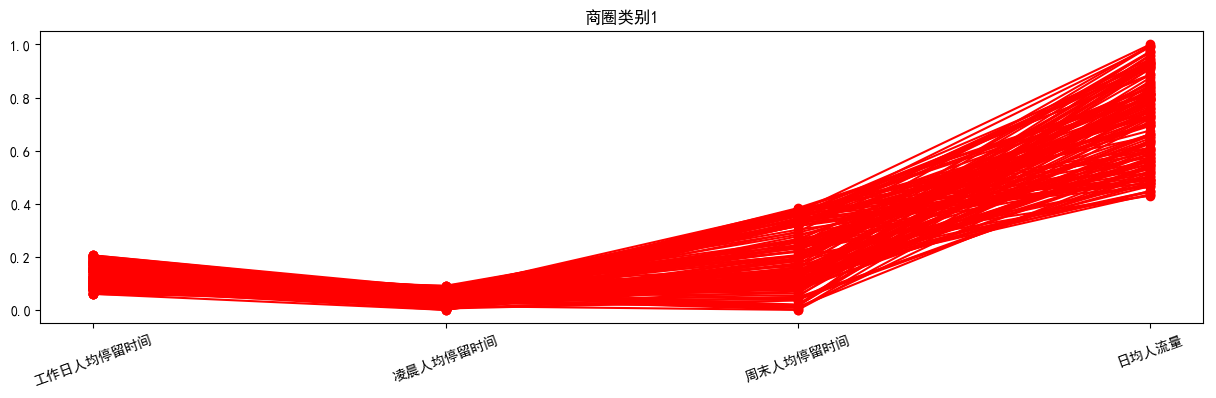

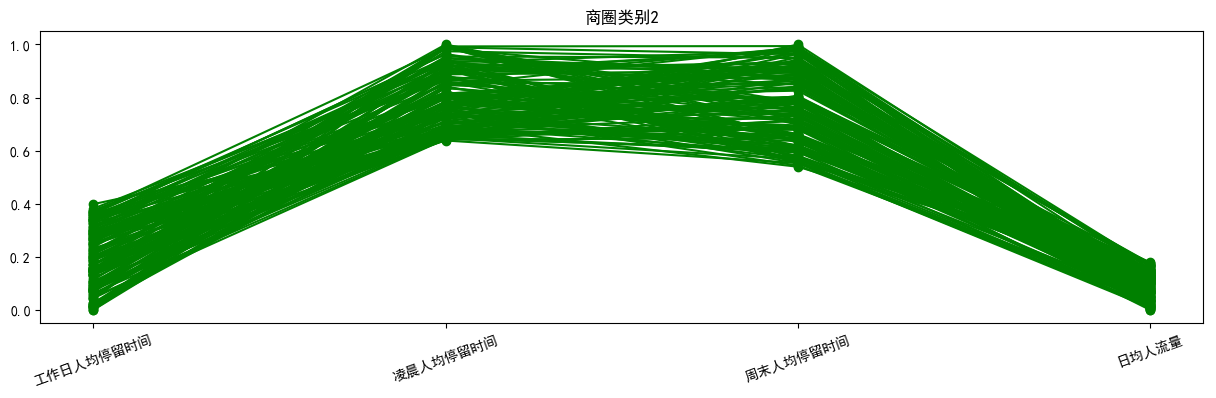

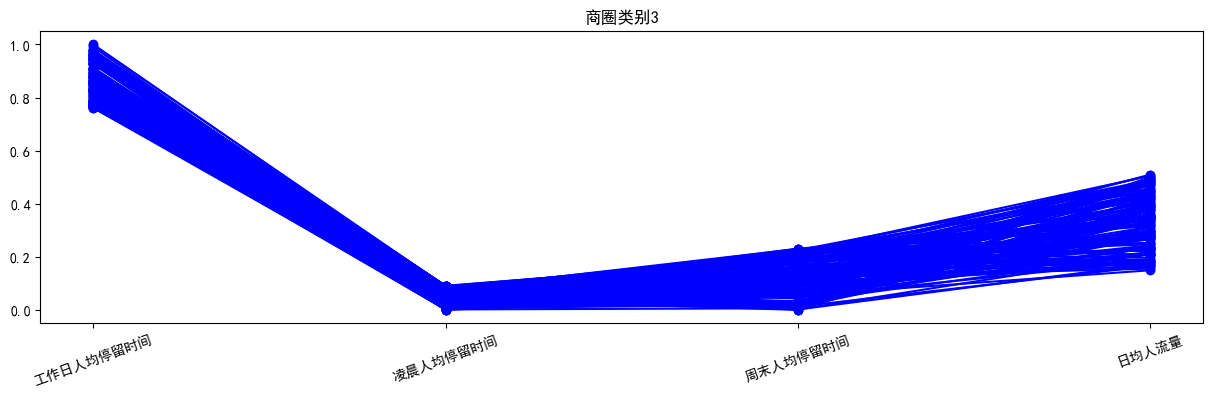

In [23]:
#-*- coding: utf-8 -*-
#层次聚类算法
import pandas as pd

#参数初始化
standardizedfile = '../data/standardized.xls' #标准化后的数据文件
k = 3 #聚类数
data = pd.read_excel(standardizedfile, index_col = u'基站编号') #读取数据

from sklearn.cluster import AgglomerativeClustering #导入sklearn的层次聚类函数
model = AgglomerativeClustering(n_clusters = k, linkage = 'ward')
model.fit(data) #训练模型

#详细输出原始数据及其类别
r = pd.concat([data, pd.Series(model.labels_, index = data.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data.columns) + [u'聚类类别'] #重命名表头
r.to_excel('../tmp/r.xls')

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

style = ['ro-', 'go-', 'bo-']
xlabels = [u'工作日人均停留时间', u'凌晨人均停留时间', u'周末人均停留时间', u'日均人流量']
pic_output = '../tmp/type_' #聚类图文件名前缀

for i in range(k): #逐一作图，作出不同样式
  plt.figure()
  tmp = r[r[u'聚类类别'] == i].iloc[:,:4] #提取每一类
  for j in range(len(tmp)):
    plt.plot(range(1, 5), tmp.iloc[j], style[i])
  
  plt.xticks(range(1, 5), xlabels, rotation = 20) #坐标标签
  plt.title(u'商圈类别%s' %(i+1)) #我们计数习惯从1开始
  plt.subplots_adjust(bottom=0.15) #调整底部
  plt.savefig(u'%s%s.png' %(pic_output, i+1)) #保存图片